<a href="https://colab.research.google.com/github/sanchariguhaniyogi/lead_Classification/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [47]:
df = pd.read_csv('lead_conv.csv', na_values='?')
#df.head()
df.columns


Index(['Opportunity No.', 'Outcome', 'Product', 'Industry', 'Region',
       'Relative Strength in the segment', 'Profit of Customer in Million',
       'Sales Value in Million', 'Profit %', 'WSES Proportion in Joint Bid',
       'Leads Conversion Class'],
      dtype='object')

In [48]:
df = df.rename(columns={'Outcome': 'target'})
df['target'].value_counts(dropna=False)

0    519
1    481
Name: target, dtype: int64

In [49]:
df = pd.get_dummies(df, columns=['Product', 'Industry', 'Region', 'Leads Conversion Class'], drop_first=True)
df

,Opportunity No.,target,Relative Strength in the segment,Profit of Customer in Million,Sales Value in Million,Profit %,WSES Proportion in Joint Bid,Product_Finsys,Product_GTMSys,Product_LearnSys,...,Region_Canada,Region_India,Region_Japan,Region_Other Europe,Region_Singapore,Region_Spain,Region_UK,Leads Conversion Class_F,Leads Conversion Class_L,Leads Conversion Class_V
0,1,0,45,2.11,10.29,29,66,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2,1,56,0.79,11.42,46,50,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,48,1.62,5.63,70,50,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,4,1,58,0.09,10.17,46,56,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5,1,49,1.46,10.60,32,54,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1,46,0.71,3.97,42,72,0,0,0,...,0,0,0,0,0,0,1,0,0,0
996,997,0,67,1.43,9.31,33,65,0,1,0,...,0,0,0,0,0,0,1,0,1,0
997,998,0,42,1.75,8.18,58,68,0,0,1,...,0,0,0,0,0,0,1,0,0,0
998,999,1,32,0.30,9.78,56,55,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
numeric_cols = ['Relative Strength in the segment', 'Profit of Customer in Million',
       'Sales Value in Million', 'Profit %', 'WSES Proportion in Joint Bid',]
cat_cols = list(set(df.columns) - set(numeric_cols) - {'target'}) #categorical columns
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['Relative Strength in the segment', 'Profit of Customer in Million', 'Sales Value in Million', 'Profit %', 'WSES Proportion in Joint Bid']
['Industry_Airline', 'Industry_Banks', 'Industry_Capital Markets', 'Industry_Clinical research', 'Industry_Consumer goods', 'Industry_Defense', 'Industry_Energy', 'Industry_Finance', 'Industry_Govt.', 'Industry_Health', 'Industry_Infrastructure', 'Industry_Insurance', 'Industry_Mobility', 'Industry_Other Govt.', 'Industry_Others', 'Industry_Security', 'Industry_Telecom equipments', 'Leads Conversion Class_F', 'Leads Conversion Class_L', 'Leads Conversion Class_V', 'Opportunity No.', 'Product_Finsys', 'Product_GTMSys', 'Product_LearnSys', 'Product_Lifesys', 'Product_Logissys', 'Product_Procsys', 'Region_Americas', 'Region_Canada', 'Region_India', 'Region_Japan', 'Region_Other Europe', 'Region_Singapore', 'Region_Spain', 'Region_UK']


In [51]:
random_seed = 1000
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['target'])


print(df_train.shape)
print(df_test.shape)
print()
print(df_train['target'].value_counts(normalize=True))
print()
print(df_test['target'].value_counts(normalize=True))

(800, 41)
(200, 41)

0    0.51875
1    0.48125
Name: target, dtype: float64

0    0.52
1    0.48
Name: target, dtype: float64


In [52]:
#Scaling the dataset 
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['target']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

In [53]:
#Fitting the model
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [54]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)


In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)
r_probs = [0 for _ in range(len(Y_test))]
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)

clf_probs =clf.predict_proba(X_test)
clf_probs = clf_probs[:, 1]
clf_fpr, clf_tpr, _ = roc_curve(Y_test, clf_probs)


In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(Y_test, r_probs)
clf_auc = roc_auc_score(Y_test, clf_probs)

In [81]:
precision, recall, thresholds = precision_recall_curve(Y_test, clf_probs )

gmeans = np.sqrt(clf_tpr * (1-clf_fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


Best Threshold=0.991362, G-Mean=0.994


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


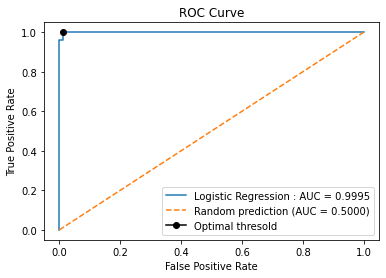

In [142]:
plot_roc_curve(clf, X_test, Y_test, label='Logistic Regression : AUC = %.4f'% (clf_auc))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.4f)' % r_auc)
plt.plot(clf_fpr[ix], clf_tpr[ix], marker='o', color= 'black', label='Optimal thresold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()


In [105]:
#Optimal thresold
clf_fpr[ix], clf_tpr[ix]


(0.012195121951219513, 1.0)

Best Threshold=0.476145, F-Score=0.994


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 360x504 with 0 Axes>

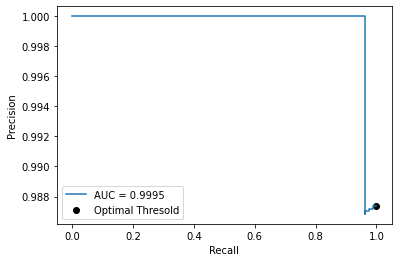

In [149]:
plt.figure(figsize=(5, 7))

plot_precision_recall_curve(clf, X_test, Y_test, label='AUC = %.4f'% (clf_auc))
yhat = clf.predict_proba(X_test)
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(Y_test, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
plt.xlabel('Recall')
plt.ylabel('Precision')
#plot_precision_recall_curve(clf, X_test, Y_test, label='AUC = %.4f'% (clf_auc))
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Optimal Thresold')
plt.legend(loc='lower left')



In [108]:
test_prob = clf.predict_proba(X_test)[:, 1] # the second column is P(target = 1)
test_pred = clf.predict(X_test)

In [110]:
print('Log loss = {:.5f}'.format(log_loss(Y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(Y_test, test_prob)))
print('Average Precision = {:.012f}'.format(average_precision_score(Y_test, test_prob)))
print('\nUsing 0.012 as the Optimum threshold:')
print('Accuracy = {:.012f}'.format(accuracy_score(Y_test, test_pred)))
print('Precision = {:.012f}'.format(precision_score(Y_test, test_pred)))
print('Recall = {:.012f}'.format(recall_score(Y_test, test_pred)))
print('F1 score = {:.012f}'.format(f1_score(Y_test, test_pred)))




Log loss = 0.02776
AUC = 0.99953
Average Precision = 0.999506849312

Using 0.012 as the Optimum threshold:
Accuracy = 0.981250000000
Precision = 0.987012987013
Recall = 0.974358974359
F1 score = 0.980645161290


Confusion Matrix


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


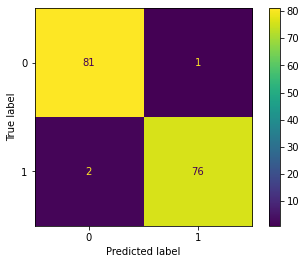

In [111]:
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, Y_test)

In [150]:
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})


,variable,unit
0,Relative Strength in the segment,10.128603
1,Profit of Customer in Million,0.500133
2,Sales Value in Million,1.970436
3,Profit %,10.278762
4,WSES Proportion in Joint Bid,11.032336


In [152]:
from sklearn import metrics
recall_sensitivity = metrics.recall_score(Y_test, test_pred, pos_label=1)
recall_specificity = metrics.recall_score(Y_test, test_pred, pos_label=0)
recall_sensitivity, recall_specificity 

(0.9743589743589743, 0.9878048780487805)

In [153]:
idx=np.argsort(test_prob)
idx=idx[::-1]
idx

array([ 79,  82,  60, 134, 133,  66,  67,  76, 129,  77,  86,  55,  87,
        89,  92,  94, 102, 103, 104, 105, 109, 136,  52,  51,   3, 156,
         4,  12,  17,  26,  27, 150, 149, 147,  36,  38, 144, 143,  40,
        47,  49, 100,  98,  80, 107,  29, 121, 159,  58, 108,   0,  46,
       151, 125,  53, 126,  14, 137, 132,  72, 113,  44, 131,  69,  78,
       138, 106, 142, 110,  81,  99,  88,  63, 155,  62,   2,  16,  85,
        75,   6, 154,  61,  73, 123,   5,  83,  45,  91, 153,  56,  24,
        15, 127, 158,  65, 140,  25, 115,  39,  31,  42,  95,  11,  37,
        48,  64, 118, 157,   8, 146, 128,  32, 120,  54,  10,  93,  68,
        18, 122, 116, 148,  23,  84,  41,  22,  50,  90, 124,  19,  96,
        97, 111,   7,  59, 130,  43,  57,   1,  34, 135, 114,  70,  28,
       117,  30, 119, 112,  71,  20, 145,  74, 101,  33,  21, 141,   9,
        13, 152,  35, 139])

In [154]:
top_10=int(0.5*len(idx))
idx_top_10=idx[:top_10]
idx_top_10

array([ 79,  82,  60, 134, 133,  66,  67,  76, 129,  77,  86,  55,  87,
        89,  92,  94, 102, 103, 104, 105, 109, 136,  52,  51,   3, 156,
         4,  12,  17,  26,  27, 150, 149, 147,  36,  38, 144, 143,  40,
        47,  49, 100,  98,  80, 107,  29, 121, 159,  58, 108,   0,  46,
       151, 125,  53, 126,  14, 137, 132,  72, 113,  44, 131,  69,  78,
       138, 106, 142, 110,  81,  99,  88,  63, 155,  62,   2,  16,  85,
        75,   6])

In [155]:
df_test.iloc[idx_top_10]#for top 10%ile leads

,Opportunity No.,target,Relative Strength in the segment,Profit of Customer in Million,Sales Value in Million,Profit %,WSES Proportion in Joint Bid,Product_Finsys,Product_GTMSys,Product_LearnSys,...,Region_Canada,Region_India,Region_Japan,Region_Other Europe,Region_Singapore,Region_Spain,Region_UK,Leads Conversion Class_F,Leads Conversion Class_L,Leads Conversion Class_V
331,332,1,51,0.69,7.42,53,55,0,0,1,...,0,0,0,0,0,0,1,0,0,1
446,447,0,71,0.96,7.82,46,44,0,0,0,...,0,0,0,0,0,0,1,0,0,1
933,934,0,60,1.22,7.22,43,57,1,0,0,...,0,0,0,0,0,0,1,0,0,1
145,146,1,34,1.20,9.37,58,68,0,0,0,...,0,0,0,0,0,0,1,0,0,1
521,522,1,35,1.22,8.94,50,57,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,149,1,41,0.31,9.57,33,51,0,1,0,...,0,0,0,1,0,0,0,0,0,0
542,543,1,42,0.90,3.80,49,70,0,0,1,...,0,0,0,0,0,0,1,1,0,0
327,328,1,44,1.36,6.69,35,67,0,0,0,...,0,1,0,0,0,0,0,0,0,0
247,248,1,45,0.29,7.31,41,62,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [156]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, X, y, cv = k_folds)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [157]:
scores
print("Cross Validation Scores are {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

Cross Validation Scores are [0.9625  0.95625 0.96875 0.975   0.96875]
Average Cross Validation score :0.9662500000000002
